In [36]:
import csv
import numpy as np

# parse input
X = []
Y = []

with open('faithful.dat') as file:
    # skipinitalspace to remove arbitrary number of spaces
    # data = csv.reader(file, delimiter=' ', skipinitialspace=True)
    
    #for row in data:
    #    if(len(row) == 3 and row[0].isdigit() and float(row[1]) and row[2].isdigit()):            
    #        X.append(row[1])
    #        Y.append(row[2])
            
    for row in file:
        row_list = row.split()
        if(len(row_list) == 3 and row_list[0].isdigit() and float(row_list[1]) and row_list[2].isdigit()):            
            X.append(row_list[1])
            Y.append(row_list[2])
        
        
X = np.array(X).astype(float)
# scikit requires 2D array(one datapoint per row, one attribute per column)
X = X.reshape(-1,1)
Y = np.array(Y).astype(int)
print(X[42])
print(Y[42])

[4.567]
84


<IPython.core.display.Javascript object>


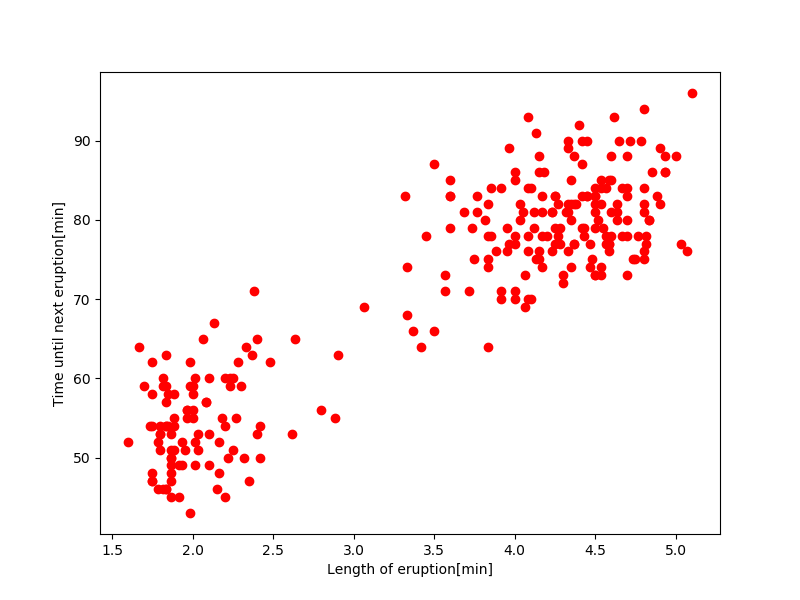

In [46]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(X,Y, 'ro')
plt.xlabel('Length of eruption[min]')
plt.ylabel('Time until next eruption[min]')
plt.axis('tight')
plt.show()

In [38]:
# Shuffle data, since it is ordered by target
n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
Y = Y[order]


Coefficients: 
 [10.74344398]
Intercept: 
 33.41719545461444
Mean squared error: 29.55
Variance score: 0.75


<IPython.core.display.Javascript object>


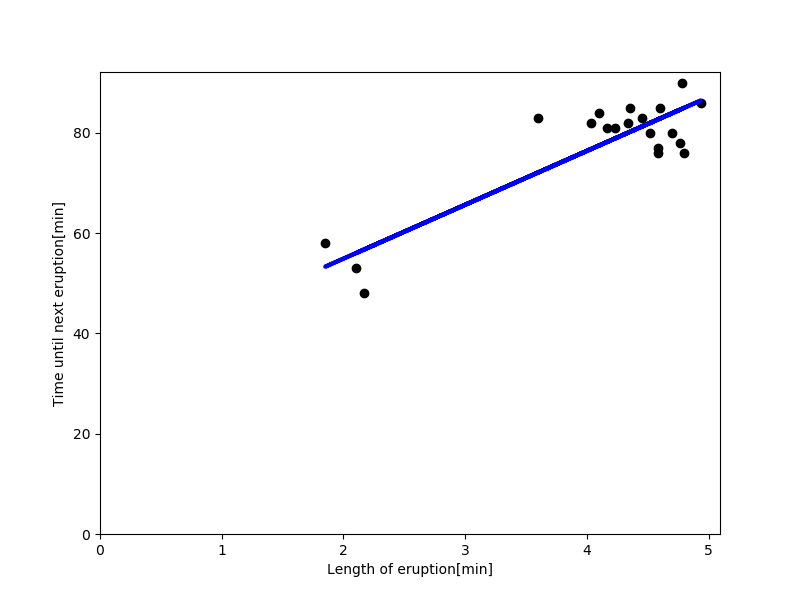

In [65]:
%matplotlib notebook
#adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.scatter(X_test, y_test,  color='black')
plt.plot( X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Length of eruption[min]')
plt.ylabel('Time until next eruption[min]')
plt.axis('tight')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

plt.show()
